# vLife Virtusa
## Campaign sentiment Analysis (Ad Evaluation)
### Usecase Description
**A person recieves an Advertisement with a text content, the machine learning model insights whether the Ad shown is good or bad based.**


### Data Source
Data set for this usecase can be found [here](https://www.kaggle.com/benvozza/spam-classification/data).


### Dataset Description
##### Features available in Data set

<p> The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text </p>

* Target column V1 - Binary Class Ham or Spam.
* Raw Text V2 
  

### Import Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from keras.models import Model
from keras.models import Sequential, model_from_json
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ec2-u

## I. Exploratory Data Analysis

In [2]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Text(0.5, 1.0, 'Number of ham and spam messages')

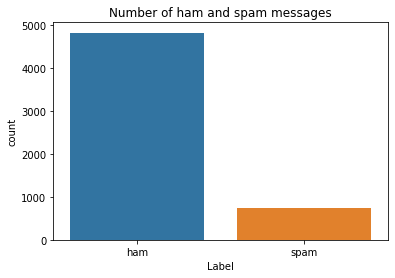

In [3]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [4]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

#Pre-Process
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

## II. Predictive Models
### Deep Learning Model -RNN

In [5]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [6]:
model = RNN()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [7]:
sequences_matrix 

array([[  0,   0,   0, ...,  13,  17, 341],
       [  0,   0,   0, ..., 462,  21, 519],
       [  0,   0,   0, ..., 851,   2, 329],
       ...,
       [  0,   0,   0, ...,  18, 196, 159],
       [  0,   0,   0, ...,   5,  12, 129],
       [  0,   0,   0, ...,  17, 405, 483]], dtype=int32)

In [8]:
scaler = StandardScaler()
sequences_matrix = scaler.fit_transform(sequences_matrix)

In [9]:
#Fit on the training data.
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.4207 - acc: 0.8625 - val_loss: 0.3658 - val_acc: 0.8608
Epoch 2/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.3318 - acc: 0.8706 - val_loss: 0.3646 - val_acc: 0.8618
Epoch 3/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.3456 - acc: 0.8780 - val_loss: 0.2990 - val_acc: 0.8681
Epoch 4/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.2967 - acc: 0.8862 - val_loss: 0.2966 - val_acc: 0.8734
Epoch 5/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.3026 - acc: 0.8854 - val_loss: 0.2963 - val_acc: 0.8703
Epoch 6/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.2964 - acc: 0.8849 - val_loss: 0.2988 - val_acc: 0.8692
Epoch 7/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.2857 - acc: 0.8812 - val_loss: 0.3030 - val_acc: 0.8681
Epoch 8/10
3788

In [10]:
model

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

## III. Save Model Architecture and Weights

In [12]:
model_save = '{}.json'.format("ad_model")
weights_save = '{}.hdf5'.format("ad_model")
json_string = model.to_json()
model.save_weights(weights_save)
with open(model_save, 'w') as f:
    json.dump(json_string, f)
print("*******************Model Saved inside ","ad_model")   

*******************Model Saved inside  ad_model


In [13]:
model_save1 = '{}.json'.format("ad_model")
weights_save1 = '{}.hdf5'.format("ad_model")
print("Json Object and Weight Object loaded")
with open(model_save1) as f:
    m = f.readline()
model_comp = model_from_json(json.loads(m))
model_comp.load_weights(weights_save1)

Json Object and Weight Object loaded


## III.Model Evaluation and Raw Prediction

In [14]:
t = ['free entry wkly comp win fa cup final tkts st may text fa receive entry questiont apply',"How's my loverboy doing ? What does he do that keeps him from coming to his Queen, hmmm ? Doesn't he ache to speak to me ? Miss me desparately ?"]

In [15]:
for i in t:
    k = sequence.pad_sequences(tok.texts_to_sequences(pd.Series(i)),maxlen=150)
    predicted = model.predict(k, verbose=0)
    if predicted[0][0] > 0.5:
            res = "Spam"
    else:
            res ="Ham"
    print(predicted," ",res)

[[0.13185027]]   Ham
[[0.90321165]]   Spam


## END